In [4]:
import numpy
import torch
import re

The corpus file the-verdict.txt is downloaded using corpus_file_download.py script.
It will serve as our training data for the exercises.

In [3]:

with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
print(f"Length of text: {len(raw_text)} characters")
print(raw_text[:42])


Length of text: 20479 characters
I HAD always thought Jack Gisburn rather a


In [6]:
text = "Hello, world. This is a test."
result = re.split(r'(\s)', text)
print(result)

['Hello,', ' ', 'world.', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test.']


In [8]:
# Split but keep the delimiters (commas, periods, and spaces) as tokens.
text = "Hello, world. This is a test."
result = re.split(r'([,.]|\s)', text)
print(result) 

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [11]:
# More comprehensive tokenizer that keeps various punctuation as separate tokens (but removes empty tokens).
text = "Hello, world. Is this-- a test?"
result = re.split(r'([,.:;?_!"()\`]|--|\s)', text)
result = [tok.strip() for tok in result if tok.strip()]
print(result) 

['Hello', ',', 'world', '.', 'Is', 'this', '--', 'a', 'test', '?']


In [39]:
# Tokenizing the actual corpus text - printing its length and first tokens.
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
   
# Split but keep various punctuation as separate tokens (but removes empty tokens).
preprocessed = re.split(r'([,.:;?_!"()\'`]|--|\s)', raw_text)
preprocessed = [tok.strip() for tok in preprocessed if tok.strip()]
print(len(preprocessed))
print(preprocessed[:30])

all_words = sorted(set(preprocessed))
vocab_size = len(all_words)
print(f"Vocab size: {vocab_size}")
print(all_words[:20])


4690
['I', 'HAD', 'always', 'thought', 'Jack', 'Gisburn', 'rather', 'a', 'cheap', 'genius', '--', 'though', 'a', 'good', 'fellow', 'enough', '--', 'so', 'it', 'was', 'no', 'great', 'surprise', 'to', 'me', 'to', 'hear', 'that', ',', 'in']
Vocab size: 1130
['!', '"', "'", '(', ')', ',', '--', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be']


In [47]:
vocab = {token:index for index, token in enumerate(all_words)}
inverse_vocab = {index:token for index, token in enumerate(all_words)}

for index, item in enumerate(vocab.items()):
    if index >= 18:
        break
    print(item)


('!', 0)
('"', 1)
("'", 2)
('(', 3)
(')', 4)
(',', 5)
('--', 6)
('.', 7)
(':', 8)
(';', 9)
('?', 10)
('A', 11)
('Ah', 12)
('Among', 13)
('And', 14)
('Are', 15)
('Arrt', 16)
('As', 17)


In [ ]:
import simple_tokenizer_v1

# Tecnically reload the module to reflect any recent changes made to it externally.
# import importlib
# importlib.reload(simple_tokenizer_v1)

tokenizer = simple_tokenizer_v1.SimpleTokenizerV1(vocab)
text = """"It's the last he painted, you know,"
          Mrs. Gisburn said with pardonable pride."""
ids = tokenizer.encode(text)
print(ids) 
    

encoded tokens: ['"', 'It', "'", 's', 'the', 'last', 'he', 'painted', ',', 'you', 'know', ',', '"', 'Mrs', '.', 'Gisburn', 'said', 'with', 'pardonable', 'pride', '.']
[1, 56, 2, 850, 988, 602, 533, 746, 5, 1126, 596, 5, 1, 67, 7, 38, 851, 1108, 754, 793, 7]


Now we will check what happens when we use an unseen token (not present in the corpus).

In [56]:
text = "This is an unseenword test."
ids = tokenizer.encode(text)
print(ids)

encoded tokens: ['This', 'is', 'an', 'unseenword', 'test', '.']


KeyError: 'unseenword'

The next tokenizer version supports unknown and end-of-text tokens, so not it 
can handle unseen words and seperate token blocks.

In [57]:
import simple_tokenizer_v2
tokenizer_v2 = simple_tokenizer_v2.SimpleTokenizerV2(vocab)
text = "This is an unseenword test."
ids = tokenizer_v2.encode(text)
print("ids:", ids)
decoded_text = tokenizer_v2.decode(ids)
print("decoded text:", decoded_text)


encoded tokens: ['This', 'is', 'an', '<|unk|>', '<|unk|>', '.']
ids: [97, 584, 156, 1130, 1130, 7]
decoded text: This is an <|unk|> <|unk|>.


In [59]:
import simple_tokenizer_v2
tokenizer_v2 = simple_tokenizer_v2.SimpleTokenizerV2(vocab)

text1 = "Hello, do you like tea?"
text2 = "In the sunlit terraces of the palace."
text = " <|endoftext|> ".join([text1, text2])
ids = tokenizer_v2.encode(text)
print("ids:", ids)
decoded_text = tokenizer_v2.decode(ids)
print("decoded text:", decoded_text)

encoded tokens: ['<|unk|>', ',', 'do', 'you', 'like', 'tea', '?', '<|endoftext|>', 'In', 'the', 'sunlit', 'terraces', 'of', 'the', '<|unk|>', '.']
ids: [1130, 5, 355, 1126, 628, 975, 10, 1131, 55, 988, 956, 984, 722, 988, 1130, 7]
decoded text: <|unk|>, do you like tea? <|endoftext|> In the sunlit terraces of the <|unk|>.


## BPE Encoding 



In [60]:
from importlib.metadata import version
import tiktoken
print("tiktoken version:", version("tiktoken"))

tiktoken version: 0.12.0


In [68]:
tokenizer = tiktoken.get_encoding("gpt2")
text = "Hello, world. This is a test. <|endoftext|> This is some unknownwordneverseenbefore."
ids = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print("tiktoken ids:", ids)
decoded_text = tokenizer.decode(ids)
print("tiktoken decoded text:", decoded_text)

tiktoken ids: [15496, 11, 995, 13, 770, 318, 257, 1332, 13, 220, 50256, 770, 318, 617, 6439, 4775, 710, 4399, 268, 19052, 13]
tiktoken decoded text: Hello, world. This is a test. <|endoftext|> This is some unknownwordneverseenbefore.


### Exercise 2.1

In [69]:
tokenizer = tiktoken.get_encoding("gpt2")
text = "Akwirw ier"
ids = tokenizer.encode(text)
print("tiktoken ids for 'Akwirw ier':", ids)
decoded_text = tokenizer.decode(ids)
print("tiktoken decoded text:", decoded_text)

tiktoken ids for 'Akwirw ier': [33901, 86, 343, 86, 220, 959]
tiktoken decoded text: Akwirw ier


### Sampling with sliding window

In [72]:
with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()
enc_text = tokenizer.encode(raw_text)
print("Length of encoded text:", len(enc_text))

enc_sample = enc_text[50:]
context_size = 4

for i in range(1, 20):
    lookback_start = max(0, i - context_size)
    context = enc_sample[lookback_start:i]
    desired = enc_sample[i]
    print(context, "->", desired)
    print(tokenizer.decode(context), "->", tokenizer.decode([desired]))
    print("---")


Length of encoded text: 5145
[290] -> 4920
 and ->  established
---
[290, 4920] -> 2241
 and established ->  himself
---
[290, 4920, 2241] -> 287
 and established himself ->  in
---
[290, 4920, 2241, 287] -> 257
 and established himself in ->  a
---
[4920, 2241, 287, 257] -> 4489
 established himself in a ->  vill
---
[2241, 287, 257, 4489] -> 64
 himself in a vill -> a
---
[287, 257, 4489, 64] -> 319
 in a villa ->  on
---
[257, 4489, 64, 319] -> 262
 a villa on ->  the
---
[4489, 64, 319, 262] -> 34686
 villa on the ->  Riv
---
[64, 319, 262, 34686] -> 41976
a on the Riv -> iera
---
[319, 262, 34686, 41976] -> 13
 on the Riviera -> .
---
[262, 34686, 41976, 13] -> 357
 the Riviera. ->  (
---
[34686, 41976, 13, 357] -> 10915
 Riviera. ( -> Though
---
[41976, 13, 357, 10915] -> 314
iera. (Though ->  I
---
[13, 357, 10915, 314] -> 2138
. (Though I ->  rather
---
[357, 10915, 314, 2138] -> 1807
 (Though I rather ->  thought
---
[10915, 314, 2138, 1807] -> 340
Though I rather thought ->  

In [90]:
import gpt_dataset_v1

with open("the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

# with stride 1 
dataloader = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=1, max_seq_length=4, stride=1, shuffle=False)

data_iter = iter(dataloader)

first_batch = next(data_iter)
print("First batch input ids:\n", first_batch)

second_batch = next(data_iter)
print("Second batch input ids:\n", second_batch)


### Exercise 2.2

# with stride 2 and seq length 6
dataloader = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=1, max_seq_length=6, stride=2, shuffle=False)

data_iter = iter(dataloader)

first_batch = next(data_iter)
print("First batch input ids:\n", first_batch)

second_batch = next(data_iter)
print("Second batch input ids:\n", second_batch)


First batch input ids:
 [tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]
Second batch input ids:
 [tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]
First batch input ids:
 [tensor([[  40,  367, 2885, 1464, 1807, 3619]]), tensor([[ 367, 2885, 1464, 1807, 3619,  402]])]
Second batch input ids:
 [tensor([[2885, 1464, 1807, 3619,  402,  271]]), tensor([[ 1464,  1807,  3619,   402,   271, 10899]])]


In [91]:
# Experimenting with larger batch size and stride equal to seq length - so there is no overlap and each batch has unique sequences.
dataloader = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=6, max_seq_length=4, stride=4, shuffle=False)

data_iter = iter(dataloader)

first_batch = next(data_iter)
print("First batch input ids:\n", first_batch)

second_batch = next(data_iter)
print("Second batch input ids:\n", second_batch)

First batch input ids:
 [tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645]]), tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049]])]
Second batch input ids:
 [tensor([[ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11],
        [  287,   262,  6001,   286],
        [  465, 13476,    11,   339],
        [  550,  5710,   465, 12036],
        [   11,  6405,   257,  5527]]), tensor([[ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287],
        [  262,  6001,   286,   465],
        [13476,    11,   339,   550],
        [ 5710,   465, 12036,    11],
        [ 6405,   257,  5527, 27075]])]


### Batching vs Sequential Processing

The key difference between true batching and processing sequences one by one:

**True Batching (batch_size=6):**
- Single forward pass for 6 sequences simultaneously
- GPU processes all sequences in parallel
- Efficient matrix operations and memory usage

**Sequential Processing (batch_size=1, repeated 6 times):**
- 6 separate forward passes
- GPU underutilized (processing one sequence at a time)
- Less efficient, even with gradient accumulation

In [92]:
# Let's demonstrate the shape difference between true batching and sequential processing

print("=== True Batching (batch_size=6) ===")
dataloader_batched = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=6, max_seq_length=4, stride=4, shuffle=False)
batch_data = next(iter(dataloader_batched))
print(f"Batch shape: {batch_data[0].shape}")  # inputs
print(f"Target shape: {batch_data[1].shape}")  # targets
print(f"Batch data:\n{batch_data[0]}")

print("\n=== Sequential Processing (batch_size=1, 6 times) ===")
dataloader_sequential = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=1, max_seq_length=4, stride=4, shuffle=False)
data_iter = iter(dataloader_sequential)

for i in range(6):
    single_batch = next(data_iter)
    print(f"Batch {i+1} shape: {single_batch[0].shape}")
    if i == 0:
        print(f"First batch data:\n{single_batch[0]}")

print("\nNotice: True batching gives us (6, 4) tensor, sequential gives us 6 separate (1, 4) tensors")
print("GPU can process the (6, 4) tensor much more efficiently!")

=== True Batching (batch_size=6) ===
Batch shape: torch.Size([6, 4])
Target shape: torch.Size([6, 4])
Batch data:
tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645]])

=== Sequential Processing (batch_size=1, 6 times) ===
Batch 1 shape: torch.Size([1, 4])
First batch data:
tensor([[  40,  367, 2885, 1464]])
Batch 2 shape: torch.Size([1, 4])
Batch 3 shape: torch.Size([1, 4])
Batch 4 shape: torch.Size([1, 4])
Batch 5 shape: torch.Size([1, 4])
Batch 6 shape: torch.Size([1, 4])

Notice: True batching gives us (6, 4) tensor, sequential gives us 6 separate (1, 4) tensors
GPU can process the (6, 4) tensor much more efficiently!


### Token Embedding

A continuous vector representation, or embedding, is necessary since GPT-like LLMs are DNN trained with back-propagation algorithm.
We initialize the embedding values with random weights which are adjusted during the model training stage.

In [98]:
vocab_size = 6
output_dim = 3

# Example where we initialize the embedding layer for a sample vocabulary and embedding dimension using random weights.
torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
print(embedding_layer.weight)

input_ids = torch.tensor([1, 2, 3, 4])
print("Input IDs:", input_ids)
print("Embedding for input_ids:", embedding_layer(input_ids))

Parameter containing:
tensor([[ 0.3374, -0.1778, -0.1690],
        [ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315],
        [-2.8400, -0.7849, -1.4096]], requires_grad=True)
Input IDs: tensor([1, 2, 3, 4])
Embedding for input_ids: tensor([[ 0.9178,  1.5810,  1.3010],
        [ 1.2753, -0.2010, -0.1606],
        [-0.4015,  0.9666, -1.1481],
        [-1.1589,  0.3255, -0.6315]], grad_fn=<EmbeddingBackward0>)


### Positional Encoding

In [101]:
# Demonstrating GPT-2 style positional embeddings

# Parameters
vocab_size = 50257  # GPT-2's vocabulary size
max_seq_length = 1024  # GPT-2 base context length
embed_dim = 768  # GPT-2 base embedding dimension

# Token embeddings (same as before)
torch.manual_seed(123)
token_embedding_layer = torch.nn.Embedding(vocab_size, embed_dim)

# Positional embeddings - one embedding vector for each possible position
pos_embedding_layer = torch.nn.Embedding(max_seq_length, embed_dim)

print(f"Token embedding shape: {token_embedding_layer.weight.shape}")
print(f"Positional embedding shape: {pos_embedding_layer.weight.shape}")

# Example with a sequence
input_ids = torch.tensor([15496, 11, 995, 13])  # Example token IDs
seq_length = input_ids.size(0)

print(f"\nInput sequence: {input_ids}")
print(f"Sequence length: {seq_length}")

# Get token embeddings
token_embeddings = token_embedding_layer(input_ids)
print(f"Token embeddings shape: {token_embeddings.shape}")

# Get positional embeddings (for positions 0, 1, 2, 3)
position_ids = torch.arange(seq_length)
pos_embeddings = pos_embedding_layer(position_ids)
print(f"Position IDs: {position_ids}")
print(f"Positional embeddings shape: {pos_embeddings.shape}")

# Final embeddings = token embeddings + positional embeddings
final_embeddings = token_embeddings + pos_embeddings
print(f"Final embeddings shape: {final_embeddings.shape}")

print(f"\nFirst token + position embedding (first few values): {final_embeddings[0, :5]}")

Token embedding shape: torch.Size([50257, 768])
Positional embedding shape: torch.Size([1024, 768])

Input sequence: tensor([15496,    11,   995,    13])
Sequence length: 4
Token embeddings shape: torch.Size([4, 768])
Position IDs: tensor([0, 1, 2, 3])
Positional embeddings shape: torch.Size([4, 768])
Final embeddings shape: torch.Size([4, 768])

First token + position embedding (first few values): tensor([ 2.9810,  1.5500,  1.6250, -1.2085,  1.4077], grad_fn=<SliceBackward0>)


### Comparison: GPT-2 vs Original Transformer Positional Encodings

**GPT-2 (Learned Absolute):**
- ✅ Learns optimal position representations during training
- ✅ Can capture complex positional patterns
- ❌ Limited by maximum sequence length during training
- ❌ Cannot extrapolate to longer sequences

**Original Transformer (Sinusoidal):**
- ✅ Can handle sequences longer than training length
- ✅ No additional parameters to learn
- ✅ Mathematical properties allow extrapolation
- ❌ Fixed pattern may not be optimal for all tasks

**Why GPT-2 chose learned embeddings:**
- Better performance on language modeling tasks
- More flexibility to learn task-specific positional patterns
- Context length was fixed anyway (1024/2048 tokens)

In [105]:
# Putting it all together: Creating a dataloader and passing a batch through the embedding layer
vocab_size = 50257
output_dim = 256
token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

max_length = 4
dataloader = gpt_dataset_v1.create_dataloader_v1(raw_text, batch_size=8, max_seq_length=max_length, stride=max_length, shuffle=False)    

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Batch input ids:\n", inputs)
print("Input shape:", inputs.shape)

torch.manual_seed(123)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)
token_embeddings = token_embedding_layer(inputs)
print("Token embeddings shape:", token_embeddings.shape)

Batch input ids:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])
Input shape: torch.Size([8, 4])
Token embeddings shape: torch.Size([8, 4, 256])


For GPT-2 model's - absolute (learned) positional embedding approach - we need to create another embedding dimension.


In [107]:
context_length = max_length = 4
output_dim = 256
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(context_length))
print(pos_embeddings.shape)

torch.Size([4, 256])


The pos_embedding is of shape: torch.Size([4, 256]) - for 4 positions and mapped embedding values.

In [ ]:
# Adding positional embeddings to token embeddings to prepare final input embeddings
input_embeddings = token_embeddings + pos_embeddings
print("Input embeddings shape after adding positional embeddings:", input_embeddings.shape)

Input embeddings shape after adding positional embeddings: torch.Size([8, 4, 256])


torch.Size([8, 4, 256]) - for a batch of 8 having 4 tokens each and 256 embedding weights per token including the mapped positional embedding. 

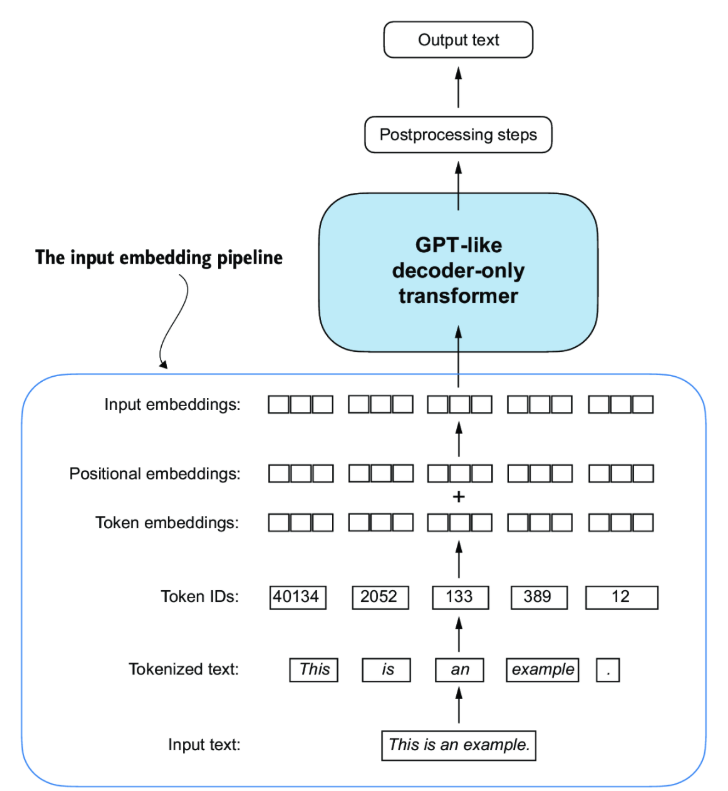